In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

/Users/lvsongke/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
%matplotlib inline

plt.style.use('fivethirtyeight')

In [5]:
train_df = pd.read_csv('tianchi/used_car_train_20200313.csv', sep='\s')
train_df.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [8]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SaleID,150000.0,7.499950e+04,43301.414527,0.000000e+00,3.749975e+04,7.499950e+04,1.124992e+05,1.499990e+05
name,150000.0,6.834917e+04,61103.875095,0.000000e+00,1.115600e+04,5.163800e+04,1.188412e+05,1.968120e+05
regDate,150000.0,2.003417e+07,53649.879255,1.991000e+07,1.999091e+07,2.003091e+07,2.007111e+07,2.015121e+07
model,149999.0,4.712902e+01,49.536040,0.000000e+00,1.000000e+01,3.000000e+01,6.600000e+01,2.470000e+02
brand,150000.0,8.052733e+00,7.864956,0.000000e+00,1.000000e+00,6.000000e+00,1.300000e+01,3.900000e+01
bodyType,145494.0,1.792369e+00,1.760640,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,7.000000e+00
fuelType,141320.0,3.758421e-01,0.548677,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,6.000000e+00
gearbox,144019.0,2.249425e-01,0.417546,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
power,150000.0,1.193165e+02,177.168419,0.000000e+00,7.500000e+01,1.100000e+02,1.500000e+02,1.931200e+04
kilometer,150000.0,1.259716e+01,3.919576,5.000000e-01,1.250000e+01,1.500000e+01,1.500000e+01,1.500000e+01


In [9]:
train_df.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

In [10]:
train_df.bodyType.unique()

array([ 1.,  2.,  0.,  5.,  3., nan,  6.,  7.,  4.])

In [13]:
from datetime import datetime
def transform_date(x):
    try:
        new_x = datetime.strptime(str(x), '%Y%m%d')
    except:
        new_x = x
    return new_x

train_df.regDate.apply(transform_date)

0         2004-04-02 00:00:00
1         2003-03-01 00:00:00
2         2004-04-03 00:00:00
3         1996-09-08 00:00:00
4         2012-01-03 00:00:00
                 ...         
149995    2000-06-07 00:00:00
149996    2009-11-02 00:00:00
149997    2010-10-03 00:00:00
149998    2006-03-12 00:00:00
149999    1999-02-04 00:00:00
Name: regDate, Length: 150000, dtype: object

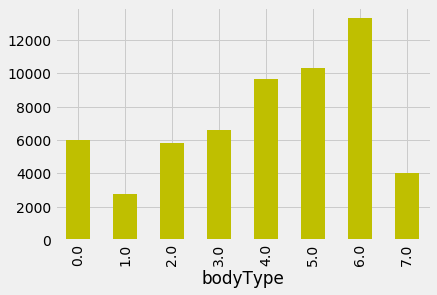

In [18]:
train_df.groupby(['bodyType'])['price'].mean().plot.bar(color='y')

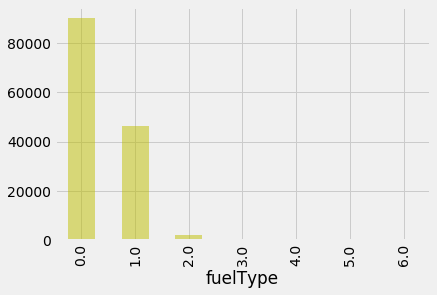

In [19]:
train_df.groupby(['fuelType'])['bodyType'].count().plot.bar(color='y', alpha=0.5)

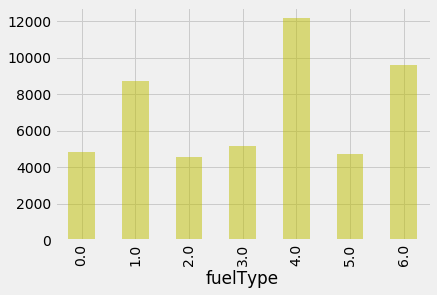

In [21]:
train_df.groupby(['fuelType'])['price'].mean().plot.bar(color='y', alpha=0.5)

In [23]:
train_df.groupby(['fuelType','bodyType'])['price'].mean()

fuelType  bodyType
0.0       0.0          4779.491649
          1.0          2700.607348
          2.0          4133.963786
          3.0          4716.727461
          4.0          9448.045449
          5.0          9589.150008
          6.0          9754.383009
          7.0          3342.602273
1.0       0.0          9118.130058
          1.0          4391.629714
          2.0          7454.795990
          3.0          7822.683567
          4.0         13371.625287
          5.0         14865.342188
          6.0         15707.218408
          7.0          4740.716828
2.0       0.0          4099.547270
          1.0          2940.686869
          2.0          3350.502008
          3.0          4023.442060
          4.0          6023.173077
          5.0          5862.335938
          6.0          8761.646617
          7.0          4612.000000
3.0       0.0          6825.705882
          1.0          4251.454545
          2.0          5822.047619
          3.0          5179.861789
 

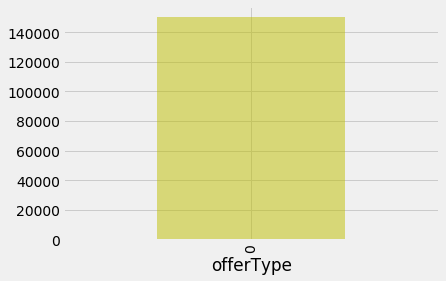

In [30]:
train_df.groupby(['offerType'])['name'].count().plot(kind='bar', color='y', alpha=0.5)

In [25]:
train_df.seller.count()

150000

In [29]:
train_df[train_df.seller == 1]

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
75924,75924,38600,20000804,66.0,9,2.0,0.0,0.0,0,15.0,...,0.236835,0.0,0.091834,0.0,0.139018,4.420761,0.240866,-5.848067,0.440098,-1.263728


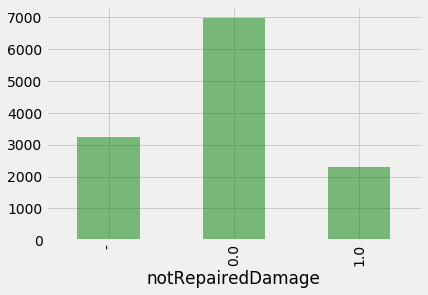

In [34]:
train_df.groupby(['notRepairedDamage'])['price'].mean().plot(kind="bar", color='green', alpha=0.5)

In [32]:
train_df.notRepairedDamage.unique()

array(['0.0', '-', '1.0'], dtype=object)

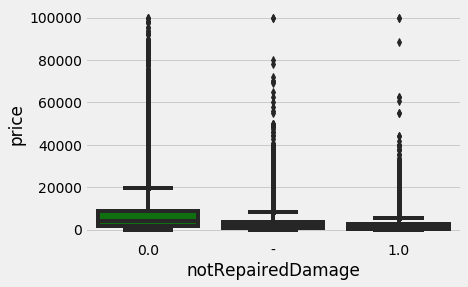

In [43]:
import seaborn as sns

sns.boxplot(x='notRepairedDamage', y='price', data=train_df, color='green')

In [63]:
lg_75 = (train_df[train_df.notRepairedDamage == 1]).index
train_df.loc[lg_75, 'notRepairedDamage'] = '1.0'
lg_75

Int64Index([     1,     14,     18,     21,     22,     35,     48,     49,
                55,     59,
            ...
            149911, 149923, 149933, 149941, 149947, 149948, 149957, 149972,
            149977, 149984],
           dtype='int64', length=24324)

In [56]:
lg_75 = (train_df[train_df.notRepairedDamage == '-']['price'] <= 3800).index
train_df.loc[lg_75, 'notRepairedDamage'] = 0


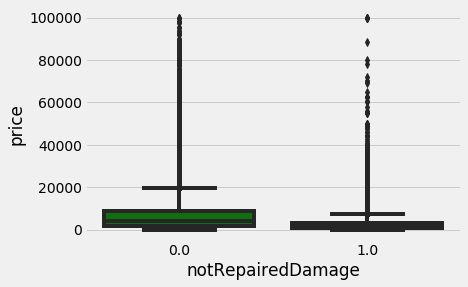

In [64]:
sns.boxplot(x='notRepairedDamage', y='price', data=train_df, color='green')

In [65]:
train_df.notRepairedDamage.unique()

array(['0.0', '1.0'], dtype=object)

In [67]:
train_df.power.max()

19312

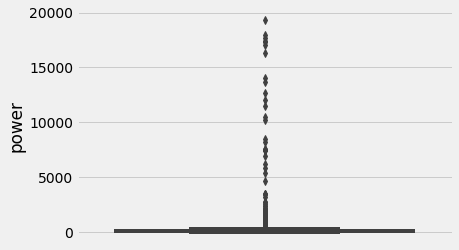

In [69]:
sns.boxplot(y='power', data=train_df)

In [76]:
train_df[train_df.power >= 600]['power'].count()

train_df.loc[train_df[train_df.power >= 600]['power'].index, 'power'] = 600

In [78]:
train_df[train_df.power >= 600]['power']

221       600
534       600
919       600
4077      600
4398      600
         ... 
148030    600
148246    600
148365    600
148665    600
149251    600
Name: power, Length: 150, dtype: int64

In [79]:
train_df.fuelType.isnull().sum()

8680

In [80]:
train_df.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

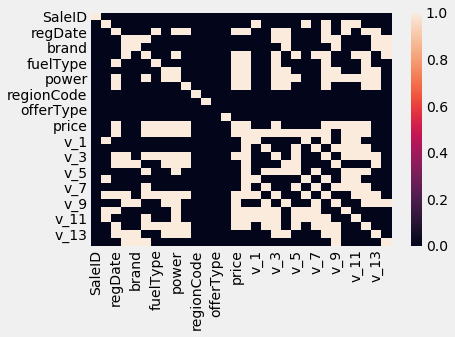

In [83]:
sns.heatmap(train_df.corr().abs() > 0.2)

In [123]:
##车身类型、燃油类型、变速箱雷响数值填充
##利用随机森林来预测，并用来填充
from sklearn.ensemble import RandomForestClassifier

train_df_drop = train_df.dropna(subset=['model'], axis=0)
body_df = train_df_drop[['bodyType','model', 'brand', 'power', 'kilometer', 'price']]
body_df_notnull = body_df.loc[(train_df_drop['bodyType'].notnull())]
body_df_is_null = body_df.loc[(train_df['bodyType'].isnull())]
X = body_df_notnull.values[:, 1:]
Y = body_df_notnull.values[:, 0]

# body_df_notnull.isnull().sum()


RFR = RandomForestClassifier(n_estimators=3000, n_jobs=-1, max_depth=10)
RFR.fit(X,Y)
predict_body = RFR.predict(body_df_is_null.values[:, 1:])
train_df.loc[body_df_is_null['bodyType'].index, 'bodyType'] = predict_body
print(predict_body)

[2. 2. 1. ... 3. 2. 1.]


In [93]:
train_df.dropna(subset=['fuelType', 'gearbox'], axis=0).isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             1615
fuelType                0
gearbox                 0
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

In [99]:
Y

array([1., 2., 1., ..., 1., 3., 6.])

In [102]:
set(Y)

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0}

In [104]:
set(predict_body)

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0}

In [105]:
len(predict_body)

1615

In [110]:
body_df_is_null['bodyType'].isnull()

188       True
224       True
1045      True
1056      True
1280      True
          ... 
149382    True
149492    True
149583    True
149759    True
149827    True
Name: bodyType, Length: 1615, dtype: bool

In [112]:
train_df.loc[body_df_is_null['bodyType'].index, 'bodyType'] = predict_body

In [113]:
train_df.bodyType.isnull().sum()

2891

In [128]:
##车身类型、燃油类型、变速箱雷响数值填充
##利用随机森林来预测，并用来填充
from sklearn.ensemble import RandomForestClassifier

train_df_drop = train_df.dropna(subset=['model'], axis=0)
fuel_df = train_df_drop[['fuelType','model', 'brand', 'power', 'kilometer', 'price']]
fuel_df_notnull = fuel_df.loc[(train_df_drop['fuelType'].notnull())]
fuel_df_is_null = fuel_df.loc[(train_df['fuelType'].isnull())]
X = fuel_df_notnull.values[:, 1:]
Y = fuel_df_notnull.values[:, 0]

# body_df_notnull.isnull().sum()


RFR_FUEL = RandomForestClassifier(n_estimators=3000, n_jobs=-1, max_depth=10)
RFR_FUEL.fit(X,Y)
predict_fuel = RFR_FUEL.predict(fuel_df_is_null.values[:, 1:])
train_df.loc[fuel_df_is_null['fuelType'].index, 'fuelType'] = predict_fuel

In [116]:
predict_fuel = RFR_FUEL.predict(fuel_df_is_null.values[:, 1:])
train_df.loc[fuel_df_is_null['fuelType'].index, 'fuelType'] = predict_fuel

In [126]:
##车身类型、燃油类型、变速箱雷响数值填充
##利用随机森林来预测，并用来填充
from sklearn.ensemble import RandomForestClassifier

train_df_drop = train_df.dropna(subset=['model'], axis=0)
box_df = train_df_drop[['gearbox','model', 'brand', 'power', 'kilometer', 'price']]
box_df_notnull = box_df.loc[(train_df_drop['gearbox'].notnull())]
box_df_is_null = box_df.loc[(train_df['gearbox'].isnull())]
X = box_df_notnull.values[:, 1:]
Y = box_df_notnull.values[:, 0]

# body_df_notnull.isnull().sum()


RFR_BOX = RandomForestClassifier(n_estimators=3000, n_jobs=-1, max_depth=10)
RFR_BOX.fit(X,Y)
predict_box = RFR_BOX.predict(box_df_is_null.values[:, 1:])
train_df.loc[box_df_is_null['gearbox'].index, 'gearbox'] = predict_box

ValueError: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required.

In [118]:
predict_box = RFR_FUEL.predict(box_df_is_null.values[:, 1:])
train_df.loc[box_df_is_null['gearbox'].index, 'gearbox'] = predict_box

In [129]:
train_df.isnull().sum()

SaleID               0
name                 0
regDate              0
model                1
brand                0
bodyType             0
fuelType             0
gearbox              0
power                0
kilometer            0
notRepairedDamage    0
regionCode           0
seller               0
offerType            0
creatDate            0
price                0
v_0                  0
v_1                  0
v_2                  0
v_3                  0
v_4                  0
v_5                  0
v_6                  0
v_7                  0
v_8                  0
v_9                  0
v_10                 0
v_11                 0
v_12                 0
v_13                 0
v_14                 0
dtype: int64

In [131]:
train_df = train_df.dropna()

In [132]:
train_df.isnull().sum()

SaleID               0
name                 0
regDate              0
model                0
brand                0
bodyType             0
fuelType             0
gearbox              0
power                0
kilometer            0
notRepairedDamage    0
regionCode           0
seller               0
offerType            0
creatDate            0
price                0
v_0                  0
v_1                  0
v_2                  0
v_3                  0
v_4                  0
v_5                  0
v_6                  0
v_7                  0
v_8                  0
v_9                  0
v_10                 0
v_11                 0
v_12                 0
v_13                 0
v_14                 0
dtype: int64

In [133]:
train_df.corr()['price']

SaleID       -0.001011
name          0.001981
regDate       0.611952
model         0.136983
brand        -0.043943
bodyType      0.244407
fuelType      0.211373
gearbox       0.327835
power         0.556421
kilometer    -0.440475
regionCode    0.014060
seller       -0.002004
offerType          NaN
creatDate     0.002959
price         1.000000
v_0           0.628516
v_1           0.060942
v_2           0.085376
v_3          -0.730919
v_4          -0.147330
v_5           0.164390
v_6           0.069008
v_7          -0.053007
v_8           0.685776
v_9          -0.206408
v_10         -0.246218
v_11         -0.275313
v_12          0.692883
v_13         -0.014321
v_14          0.035611
Name: price, dtype: float64

In [145]:
train_df.corr()['price']

SaleID       -0.001011
name          0.001981
regDate       0.611952
model         0.136983
brand        -0.043943
bodyType      0.244407
fuelType      0.211373
gearbox       0.327835
power         0.556421
kilometer    -0.440475
regionCode    0.014060
seller       -0.002004
offerType          NaN
creatDate     0.002959
price         1.000000
v_0           0.628516
v_1           0.060942
v_2           0.085376
v_3          -0.730919
v_4          -0.147330
v_5           0.164390
v_6           0.069008
v_7          -0.053007
v_8           0.685776
v_9          -0.206408
v_10         -0.246218
v_11         -0.275313
v_12          0.692883
v_13         -0.014321
v_14          0.035611
Name: price, dtype: float64

In [150]:
from sklearn.decomposition import PCA

pca = PCA(n_components=26)

train_df_pca = train_df.drop(['SaleID', 'name', 'seller', 'offerType', 'creatDate'], axis=1)
pca_data = pca.fit_transform(train_df_pca)
print(pca_data)
pca_df = pd.DataFrame(pca_data, columns=train_df_pca.columns)

[[ 5.85777385e+03 -4.60752619e+03 -1.50099959e+03 ... -3.67258288e-05
   9.73260719e-07  6.81808255e-09]
 [-4.05508837e+03 -1.96753010e+03  1.79733045e+03 ... -1.03849092e-05
  -7.47835531e-06  2.90890942e-09]
 [ 6.23580074e+03 -2.38021246e+02  2.25764325e+02 ... -8.97748027e-05
   3.45275939e-06  9.12736138e-09]
 ...
 [ 6.67199233e+04 -4.19058986e+03  7.61636927e+02 ... -4.62733044e-05
   1.49818912e-07  3.78210721e-09]
 [ 2.59651380e+04 -3.18149130e+03 -6.77635864e+02 ... -6.25874982e-06
  -4.61317199e-06  6.74830201e-09]
 [-4.39068768e+04  2.55780238e+03 -2.37472197e+03 ... -4.33705807e-05
  -3.84238504e-06 -1.54602025e-08]]


In [151]:
pca_df.head()

,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,5857.773853,-4607.526187,-1500.999591,31.759200,-13.717478,-2.000093,-5.727306,1.190579,-0.378651,2.205027,...,-0.053941,0.014799,0.001913,0.000726,-0.000271,-0.000188,0.000135,-0.000037,9.732607e-07,6.818083e-09
1,-4055.088366,-1967.530096,1797.330447,103.933928,-0.653989,-8.164845,-8.225162,-0.686288,3.156290,-1.785491,...,0.098335,0.006280,0.000366,-0.002004,-0.000230,0.000520,0.000080,-0.000010,-7.478355e-06,2.908909e-09
2,6235.800740,-238.021246,225.764325,-49.261624,64.633348,2.591761,-6.354039,2.957124,-0.151063,-1.862740,...,0.298396,0.004732,-0.001602,-0.001070,0.000879,-0.000842,-0.000196,-0.000090,3.452759e-06,9.127361e-09
3,-73292.088504,2795.954329,-2182.216859,-88.021823,66.249083,-1.785235,-6.672467,2.150821,-1.069892,-1.815505,...,-0.595372,-0.003721,-0.001832,0.000264,0.000148,0.001015,-0.000069,0.000037,4.829493e-06,-1.200563e-09
4,85549.618061,-8102.039605,4469.655694,26.191230,55.059950,-7.381624,-1.233039,0.599613,-5.557981,1.404077,...,-0.088893,-0.009761,-0.000896,0.002705,0.000068,-0.000182,-0.000177,-0.000017,-3.811033e-06,-7.466421e-09


In [152]:
from sklearn.model_selection import GridSearchCV

def get_best_model_and_accuracy(model, params, X, y):
    grid = GridSearchCV(model, ##要搜索的模型
                       params, ##要尝试的参数
                       error_score=0.)  ##如果报错，结果是0
    grid.fit(X, y) #拟合模型和参数
    # 性能指标
    print('best accuracy: {}'.format(grid.best_score_))
    # 得到最佳准确率的最佳参数
    print('best parameters:{}'.format(grid.best_params_))
    # 拟合的平均时间(秒)
    print('average time to fit (s): {}'.format(round(grid.cv_results_['mean_fit_time'].mean(), 3)))
    ## 预测的平均时间
    # 从该指标可以看出模型在真实世界的性能
    print("Average Time to Score (s):{}".format(round(grid.cv_results_['mean_score_time'].mean(), 3)))

In [153]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR



In [160]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
cars_params = {'preprocessing__scale__with_std': [True, False],
              'preprocessing__scale__with_mean': [True, False],
              'preprocessing__pca__n_components': range(1,26),
               'preprocessing__lda__n_components':range(1, 24),
               'clf__n_neighbors': range(1,9)
              }

cars_X = train_df_pca.drop(['price'], axis=1)
cars_y = train_df_pca.price.values

preprocessing = Pipeline([('scale', StandardScaler()), ('pca', PCA()), ('lda', LinearDiscriminantAnalysis())])

KNN_pipeline = Pipeline(steps=[('preprocessing', preprocessing), ('clf', KNeighborsRegressor())])

get_best_model_and_accuracy(KNN_pipeline, cars_params, cars_X, cars_y)

KeyboardInterrupt: 

In [155]:
train_df_pca.price.values

array([1850, 3600, 6222, ..., 7500, 4999, 4700])